In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [74]:
df = pd.read_csv("Dry_Eye_Dataset_raw.csv")

In [75]:
df.info()
# Displays we have 26 columns
# Each column has 20,000 values. No-null values in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       20000 non-null  object 
 1   Age                          20000 non-null  int64  
 2   Sleep duration               20000 non-null  float64
 3   Sleep quality                20000 non-null  int64  
 4   Stress level                 20000 non-null  int64  
 5   Blood pressure               20000 non-null  object 
 6   Heart rate                   20000 non-null  int64  
 7   Daily steps                  20000 non-null  int64  
 8   Physical activity            20000 non-null  int64  
 9   Height                       20000 non-null  int64  
 10  Weight                       20000 non-null  int64  
 11  Sleep disorder               20000 non-null  object 
 12  Wake up during night         20000 non-null  object 
 13  Feel sleepy duri

In [76]:
# Create a copy
# PP = Pre-Processed
df_PP = df.copy()

df_PP.to_csv('Dry_Eye_Dataset_PreProcessed.csv', index=False)
print("\nPre-Processed dataset saved to 'Dry_Eye_Dataset_PreProcessed.csv'")


Pre-Processed dataset saved to 'Dry_Eye_Dataset_PreProcessed.csv'


In [77]:
df_PP.info()
# Displays we have 26 columns
# Each column has 20,000 values. No-null values in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       20000 non-null  object 
 1   Age                          20000 non-null  int64  
 2   Sleep duration               20000 non-null  float64
 3   Sleep quality                20000 non-null  int64  
 4   Stress level                 20000 non-null  int64  
 5   Blood pressure               20000 non-null  object 
 6   Heart rate                   20000 non-null  int64  
 7   Daily steps                  20000 non-null  int64  
 8   Physical activity            20000 non-null  int64  
 9   Height                       20000 non-null  int64  
 10  Weight                       20000 non-null  int64  
 11  Sleep disorder               20000 non-null  object 
 12  Wake up during night         20000 non-null  object 
 13  Feel sleepy duri

In [78]:
df_PP.head(4)

,Gender,Age,Sleep duration,Sleep quality,Stress level,Blood pressure,Heart rate,Daily steps,Physical activity,Height,Weight,Sleep disorder,Wake up during night,Feel sleepy during day,Caffeine consumption,Alcohol consumption,Smoking,Medical issue,Ongoing medication,Smart device before bed,Average screen time,Blue-light filter,Discomfort Eye-strain,Redness in eye,Itchiness/Irritation in eye,Dry Eye Disease
0,F,24,9.5,2,1,137/89,67,3000,31,161,69,Y,N,N,N,N,N,Y,Y,N,8.7,N,Y,Y,N,Y
1,M,39,9.6,2,3,108/64,60,12000,74,164,87,N,N,N,N,Y,N,Y,Y,N,9.6,Y,N,N,Y,Y
2,F,45,5.4,1,5,134/81,95,12000,93,179,94,Y,Y,N,Y,Y,N,N,N,Y,4.0,N,Y,N,N,N
3,F,45,5.4,4,5,110/90,78,19000,32,160,77,N,N,N,Y,N,N,Y,N,N,7.6,N,Y,N,Y,N


In [79]:
# Identify columns with Y/N values 
y_n_columns = []
for col in df.columns:
    if df[col].dtype == 'object':  # Check if column is string type
        # Standardize case before checking
        values = set(df[col].astype(str).str.strip().str.upper())
        if 'Y' in values and 'N' in values:
            y_n_columns.append(col)

print(f"Columns with Y/N values: {y_n_columns}")

# Create a copy to avoid modifying the original dataframe
df_PP = df.copy()

# Convert Y/N columns to numeric (1/0)
for col in y_n_columns:
    # Standardize values before mapping
    df_PP[col] = df_PP[col].astype(str).str.strip().str.upper()
    df_PP[col] = df_PP[col].map({'Y': 1, 'N': 0})
    # Verify the mapping worked
    print(f"Converted {col}: {df_PP[col].value_counts().to_dict()}")

Columns with Y/N values: ['Sleep disorder', 'Wake up during night', 'Feel sleepy during day', 'Caffeine consumption', 'Alcohol consumption', 'Smoking', 'Medical issue', 'Ongoing medication', 'Smart device before bed', 'Blue-light filter', 'Discomfort Eye-strain', 'Redness in eye', 'Itchiness/Irritation in eye', 'Dry Eye Disease']
Converted Sleep disorder: {0: 10069, 1: 9931}
Converted Wake up during night: {0: 10000, 1: 10000}
Converted Feel sleepy during day: {0: 10178, 1: 9822}
Converted Caffeine consumption: {1: 10089, 0: 9911}
Converted Alcohol consumption: {1: 10009, 0: 9991}
Converted Smoking: {0: 10017, 1: 9983}
Converted Medical issue: {0: 10111, 1: 9889}
Converted Ongoing medication: {1: 10082, 0: 9918}
Converted Smart device before bed: {1: 10003, 0: 9997}
Converted Blue-light filter: {0: 10016, 1: 9984}
Converted Discomfort Eye-strain: {1: 10037, 0: 9963}
Converted Redness in eye: {0: 10129, 1: 9871}
Converted Itchiness/Irritation in eye: {0: 10063, 1: 9937}
Converted Dry Ey

In [80]:
df_PP.head(4)

,Gender,Age,Sleep duration,Sleep quality,Stress level,Blood pressure,Heart rate,Daily steps,Physical activity,Height,Weight,Sleep disorder,Wake up during night,Feel sleepy during day,Caffeine consumption,Alcohol consumption,Smoking,Medical issue,Ongoing medication,Smart device before bed,Average screen time,Blue-light filter,Discomfort Eye-strain,Redness in eye,Itchiness/Irritation in eye,Dry Eye Disease
0,F,24,9.5,2,1,137/89,67,3000,31,161,69,1,0,0,0,0,0,1,1,0,8.7,0,1,1,0,1
1,M,39,9.6,2,3,108/64,60,12000,74,164,87,0,0,0,0,1,0,1,1,0,9.6,1,0,0,1,1
2,F,45,5.4,1,5,134/81,95,12000,93,179,94,1,1,0,1,1,0,0,0,1,4.0,0,1,0,0,0
3,F,45,5.4,4,5,110/90,78,19000,32,160,77,0,0,0,1,0,0,1,0,0,7.6,0,1,0,1,0


In [81]:
# Check for duplicates
duplicate_count = df_PP.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [82]:
pd.options.display.max_columns = None # Use this option to display all columns
df_PP.describe().style.format("{:.1f}")  # I use .style.format("{:.1f}") to make the output more concise

# Remember: "Y" = 1 and "N" = 0

,Age,Sleep duration,Sleep quality,Stress level,Heart rate,Daily steps,Physical activity,Height,Weight,Sleep disorder,Wake up during night,Feel sleepy during day,Caffeine consumption,Alcohol consumption,Smoking,Medical issue,Ongoing medication,Smart device before bed,Average screen time,Blue-light filter,Discomfort Eye-strain,Redness in eye,Itchiness/Irritation in eye,Dry Eye Disease
count,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0
mean,31.4,7.0,3.0,3.0,79.9,10536.9,90.1,174.9,74.9,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,5.5,0.5,0.5,0.5,0.5,0.7
std,8.1,1.7,1.4,1.4,11.8,5752.7,52.3,14.7,14.7,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,2.6,0.5,0.5,0.5,0.5,0.5
min,18.0,4.0,1.0,1.0,60.0,1000.0,0.0,150.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
25%,24.0,5.5,2.0,2.0,70.0,6000.0,45.0,162.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.3,0.0,0.0,0.0,0.0,0.0
50%,31.0,7.0,3.0,3.0,80.0,11000.0,91.0,175.0,75.0,0.0,0.5,0.0,1.0,1.0,0.0,0.0,1.0,1.0,5.5,0.0,1.0,0.0,0.0,1.0
75%,39.0,8.5,4.0,4.0,90.0,16000.0,135.0,188.0,88.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7.8,1.0,1.0,1.0,1.0,1.0
max,45.0,10.0,5.0,5.0,100.0,20000.0,180.0,200.0,100.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10.0,1.0,1.0,1.0,1.0,1.0


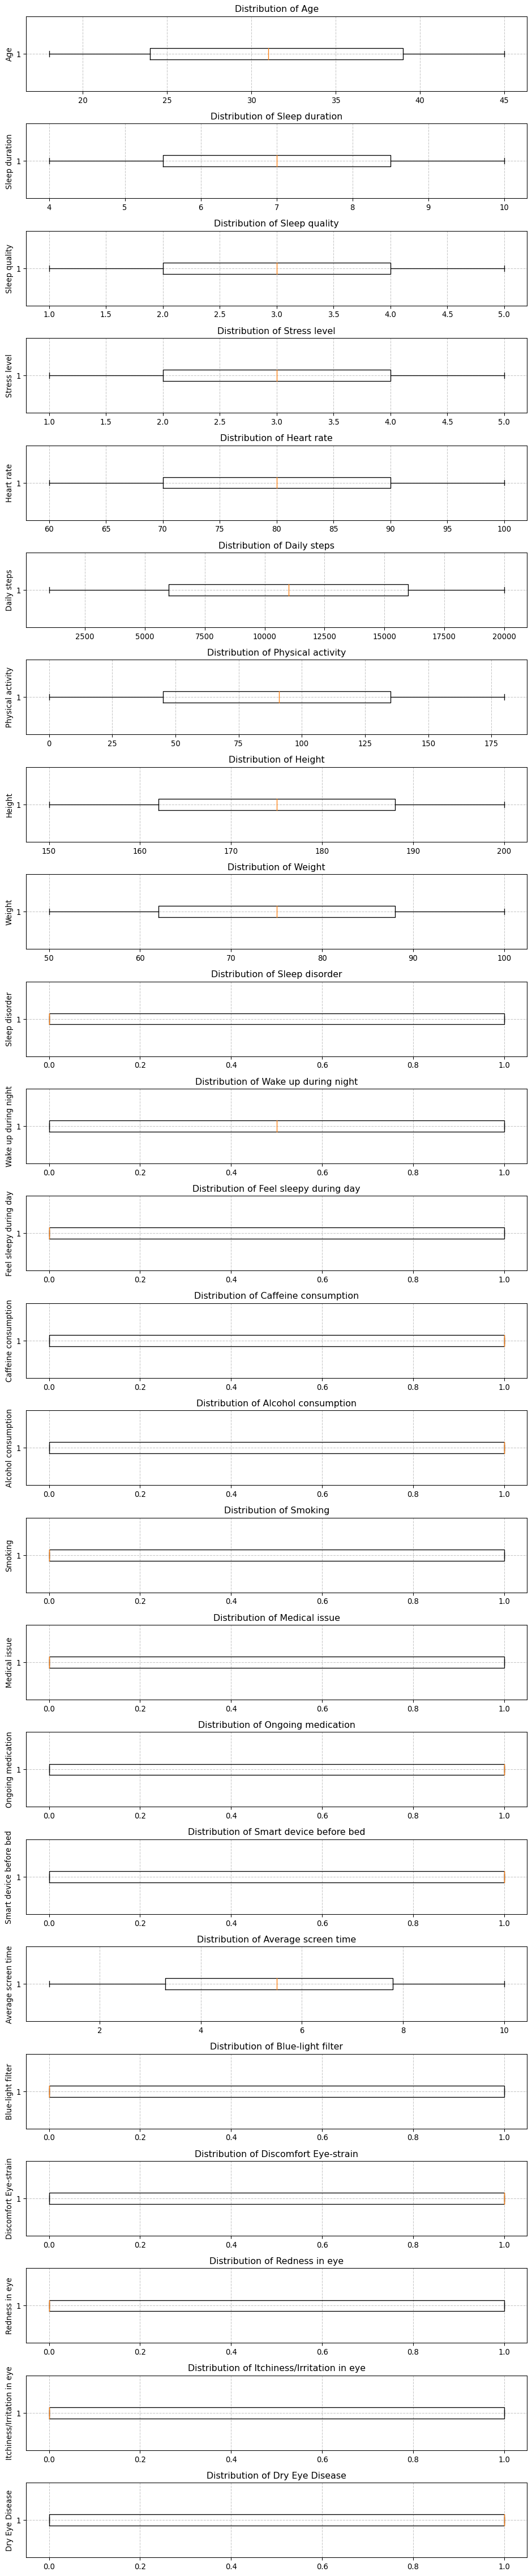

In [83]:
# Select only numeric columns for boxplots
numeric_cols = df_PP.select_dtypes(include=[np.number]).columns.tolist()
num_cols = len(numeric_cols)

# Create subplots - one for each numeric column
fig, axs = plt.subplots(num_cols, 1, dpi=95, figsize=(10, num_cols * 2))

# Handle case where there's only one subplot
if num_cols == 1:
    axs = [axs]

# Create horizontal boxplots for each numeric column
for i, col in enumerate(numeric_cols):
    axs[i].boxplot(df_PP[col], vert=False)
    axs[i].set_ylabel(col)
    axs[i].set_title(f'Distribution of {col}')
    
    # Add grid lines for better readability
    axs[i].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Box plots display there are no outliers in the data

In [84]:
df_PP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       20000 non-null  object 
 1   Age                          20000 non-null  int64  
 2   Sleep duration               20000 non-null  float64
 3   Sleep quality                20000 non-null  int64  
 4   Stress level                 20000 non-null  int64  
 5   Blood pressure               20000 non-null  object 
 6   Heart rate                   20000 non-null  int64  
 7   Daily steps                  20000 non-null  int64  
 8   Physical activity            20000 non-null  int64  
 9   Height                       20000 non-null  int64  
 10  Weight                       20000 non-null  int64  
 11  Sleep disorder               20000 non-null  int64  
 12  Wake up during night         20000 non-null  int64  
 13  Feel sleepy duri

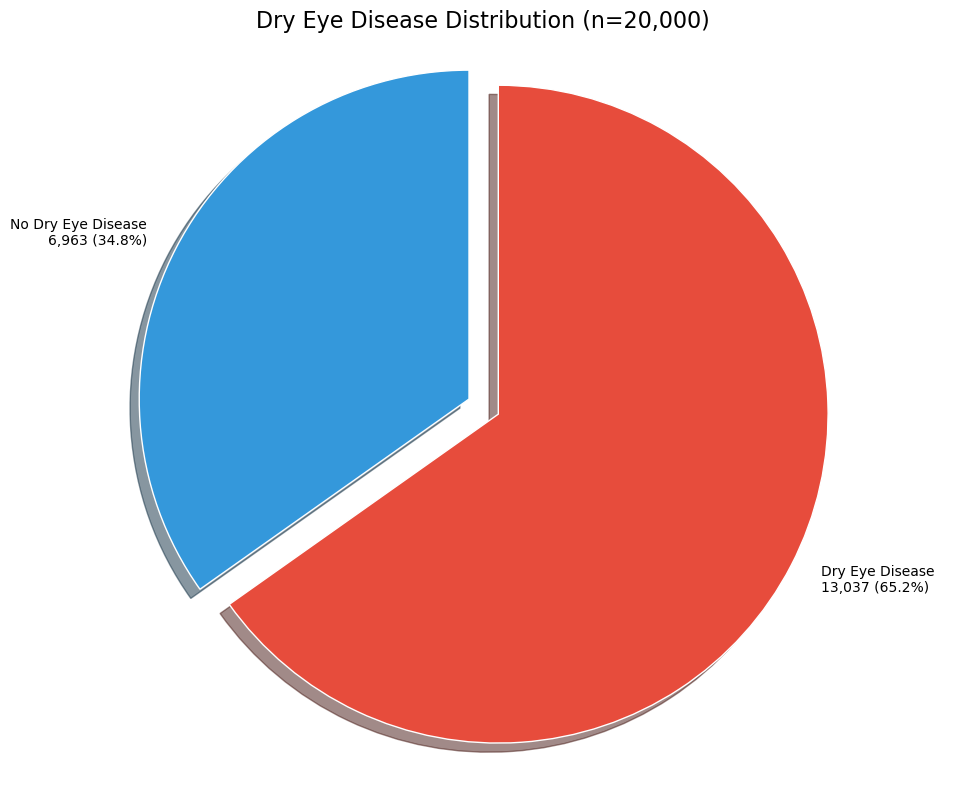

In [85]:
# Count dry eye occurrences
dry_eye_counts = df_PP['Dry Eye Disease'].value_counts()
no_dry_eye = dry_eye_counts.get(0, 0)
has_dry_eye = dry_eye_counts.get(1, 0)
total = no_dry_eye + has_dry_eye

# Create labels with counts and percentages
labels = [f'No Dry Eye Disease\n{no_dry_eye:,} ({no_dry_eye/total*100:.1f}%)', 
          f'Dry Eye Disease\n{has_dry_eye:,} ({has_dry_eye/total*100:.1f}%)']

# Create pie chart
plt.figure(figsize=(10, 8))
colors = ['#3498db', '#e74c3c']
explode = (0, 0.1)  # explode the 2nd slice (Dry Eye)

plt.pie([no_dry_eye, has_dry_eye], explode=explode, labels=labels, 
        colors=colors, shadow=True, startangle=90, 
        wedgeprops={'edgecolor': 'white', 'linewidth': 1})

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title(f'Dry Eye Disease Distribution (n={total:,})', fontsize=16)
plt.tight_layout()
plt.show()

In [86]:
# Create a copy of UPDATED
# PP = Pre-Processed
df_PreProcessed = df_PP.copy()

df_PP.to_csv('Dry_Eye_Dataset_Pre-Processed.csv', index=False)
print("\nPre-Processed dataset saved to 'Dry_Eye_Dataset_Pre-Processed.csv'")


Pre-Processed dataset saved to 'Dry_Eye_Dataset_Pre-Processed.csv'
